In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from glob import glob
import os
import sys

import h5py
import numpy as np

from tsne import bh_sne

In [2]:
data_h5 = h5py.File('./raw_data/dsp_hw2/data.h5','r')
labels = data_h5['labels'][:]
data_h5.close()

In [12]:
h5_file = glob('result/dsp_hw2/Seq2seqAutoencoder_BasicLSTMCell1_BasicLSTMCell1_hidden_256_encode_dim10_minloss_1.15030034383/*.h5')[0]
#h5_files = sorted(glob('keras_scripts/*.h5'))
print h5_file
#h5_file = 'keras_scripts/epoch99_conv.h5'


result/dsp_hw2/Seq2seqAutoencoder_BasicLSTMCell1_BasicLSTMCell1_hidden_256_encode_dim10_minloss_1.15030034383/Seq2seqAutoencoder_BasicLSTMCell1_BasicLSTMCell1_hidden_256_encode_dim10_minloss_1.15030034383.h5


In [13]:
h5_handle = h5py.File(h5_file,'r')
code = h5_handle['code'][:]
#recX = h5_handle['recX'][:]
print code.shape
#print recX.shape

(708, 10)


In [10]:
h5_handle['recX']

<HDF5 dataset "recX": shape (708, 1, 60, 75), type "<f4">

In [14]:
tsne_code = bh_sne(code.astype('float64'))

### Label by digits

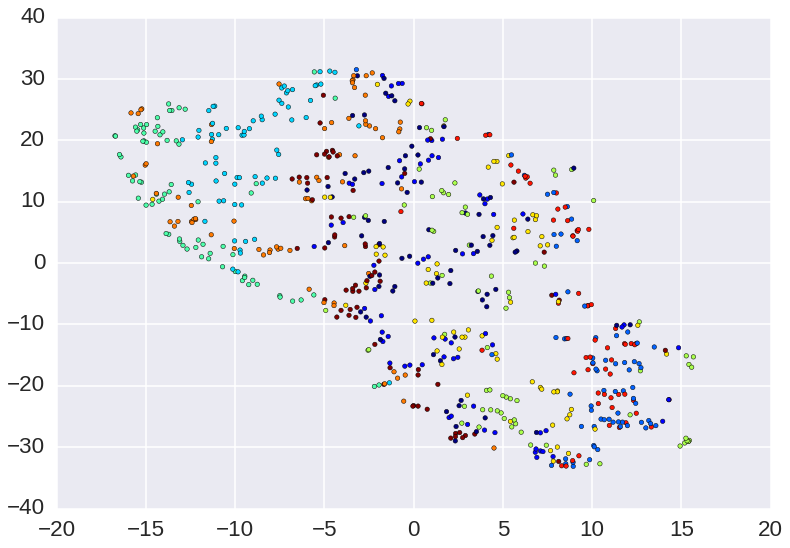

In [15]:
plt.figure()
plt.scatter(tsne_code[:,0], tsne_code[:,1],c=labels,cmap='jet')
plt.show()

### Label by gender

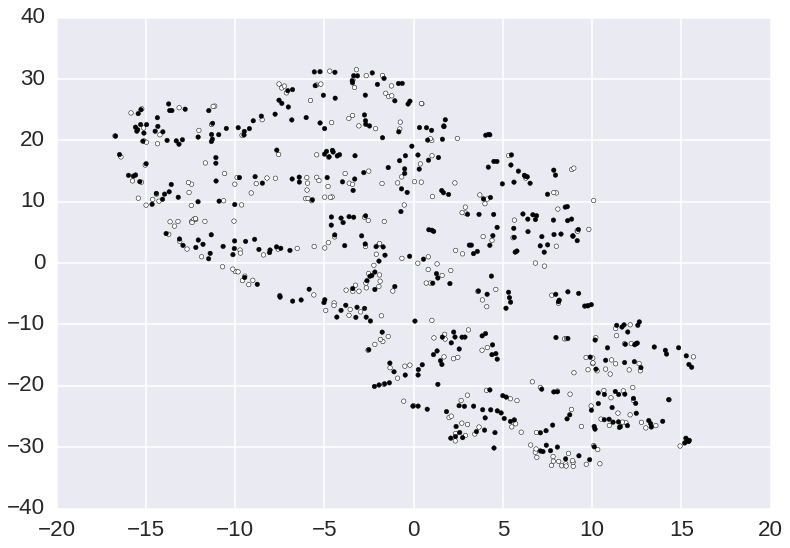

In [17]:
male = np.zeros(302)
female = np.ones(708-302)
gender = np.concatenate((male,female))

plt.figure()
plt.scatter(tsne_code[:,0], tsne_code[:,1],c=gender)
plt.show()

### Plot with pandas dataframe

In [18]:
import pandas as pd

values = np.hstack([ tsne_code, labels[:,None]])

df = pd.DataFrame(values, index=range(values.shape[0]), columns=['x','y','digit'] )

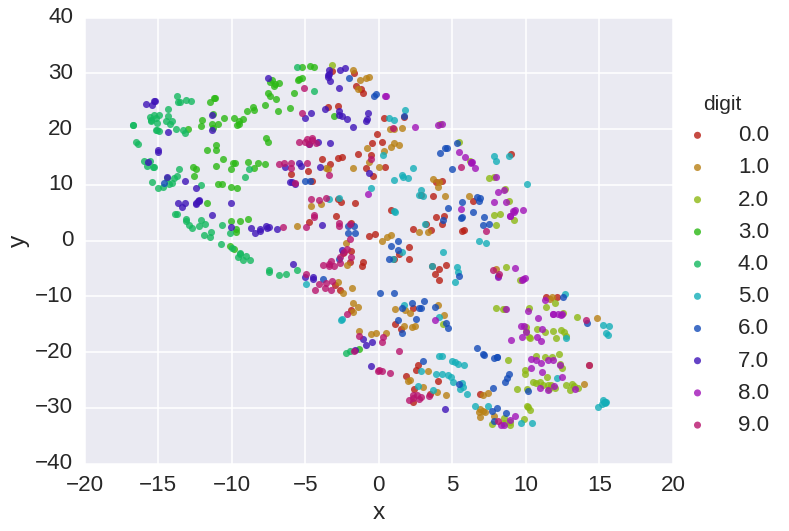

In [19]:
import seaborn as sns
sns.set_context("poster", font_scale=1.4)
sns.set_style("darkgrid")

sns.lmplot('x', 'y', 
           data=df,
           hue='digit',
           fit_reg=False,
           palette=sns.hls_palette(10, l=.4, s=0.8),
           size=8,
           aspect=1.25,
           scatter_kws={"s": 50}
          )

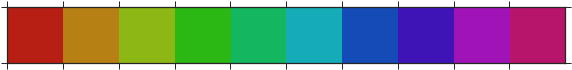

In [55]:
sns.palplot(sns.hls_palette(10, l=.4, s=0.8))